<a href="https://colab.research.google.com/github/sshirinkam-creator/Deep-Learning-Model-for-Dynamic-Forecasting-of-Blood-Glucose-Level-for-Type-2-Diabetes-Mellitus/blob/main/Sara_Shirinkam_HW4_Ver02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sara Shirinkam
## HW 4

## P1 (35pt):
Write a Python code using NumPy, Matplotlib, and Keras to perform image
classification for the Fashion_MINIST datset (https://github.com/zalandoresearch/fashionmnist)
1. (5pt) Load the dataset using tf.keras.datasets.fashion_mnist.load_data() and show the first 12 images of the training dataset in two rows.





In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import numpy as np  
np.random.seed(100)

tf.random.set_seed(100)

In [ ]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28) train_labels shape: (60000,)


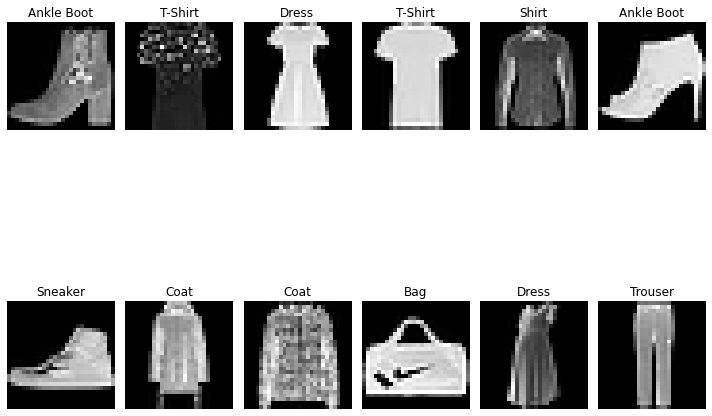

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 6
rows = 2
fig = plt.figure(figsize=(10, 10))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


1. (5pt) Add the “depth” dimension to the training/testing image data using .reshape(), use to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1]. Print out the shapes of training and testing images. Note that the imported training/testing image data have a shape of (number_samples, image_height, image_width) and you want to reshape it into the shape of (number_samples, image_height, image_width, image_depth/image_channels)

In [ ]:
from tensorflow.keras.utils import to_categorical
#reshape data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# convert from integers to floats and normalize to range 0-1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
# convert labes based on one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print("Number of train data - " + str(len(train_images)))
print("Number of test data - " + str(len(test_images)))

Number of train data - 60000
Number of test data - 10000


2. (10pt) Build a CNN model using a stack of Conv2D (128 filters of size (3, 3) with ReLU
activation), MaxPooling2D (pool size of (2, 2)), Conv2D (64 filters of size (3, 3 with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary(). You need to specify other parameters of the input layer and output layer.

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

3. (10pt) Compile and train the model for 10 epochs and batch size of 32. Set verbose = 0 during the training to compress the training progress. Draw the plot of the training accuracy w.r.t. the epoch number. You need to specify the right optimizer, loss function, and metrics for this task.

In [ ]:
batch_size = 32
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 181s 96ms/step - loss: 0.1740 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.1493 - accuracy: 0.9446
Epoch 3/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.1302 - accuracy: 0.9511
Epoch 4/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.1142 - accuracy: 0.9571
Epoch 5/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.1001 - accuracy: 0.9617
Epoch 6/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0892 - accuracy: 0.9667
Epoch 7/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0777 - accuracy: 0.9703
Epoch 8/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0688 - accuracy: 0.9733
Epoch 9/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0616 - accuracy: 0.9763
Epoch 10/10
1875/1875 [==============================] 

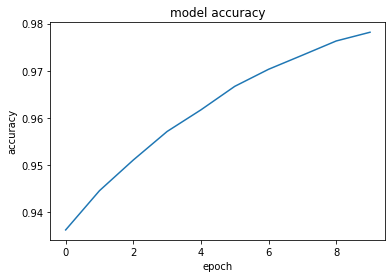

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
plt.show()

4. (5pt) Test your trained model on the testing dataset and observe the loss and accuracy using .evaluate().

In [ ]:
_,acc=model.evaluate(test_images, test_labels, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.370


## P2 (65pt):
Write a Python code using NumPy, Matploblib and Keras to perform image
classification using pre-trained model for the CIFAR-10 dataset
(https://www.cs.toronto.edu/~kriz/cifar.html).

2. (5pt) Load the dataset using tf.keras.datasets.cifar10.load_data() and show the first 20 images of the training dataset in two rows. You will obtain the pair of feature matrix and label vector for the training dataset and the pair of feature matrix and label vector for the testing dataset at the end of this step. Note that the CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, each with a label value within [0, 9]. In the following step, we want to partition this dataset into two training/testing pairs, one containing images with labels in [0, 4] and the other containing images with labels in [5, 9].










In [ ]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.cifar10.load_data()
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
train_images shape: (50000, 32, 32, 3) train_labels shape: (50000, 1)


In [ ]:
labels_map = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: ' truck'}
columns = 20
rows = 2
fig = plt.figure(figsize=(5, 5))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([32, 32])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 360x360 with 0 Axes>

3. (5 pt) Reshape the label vectors in both the training and testing datasets to 1D using .reshape(), and compare them with 5 to find out the indices of images that have class labels < 5 and class labels >= 5, respectively, in the training and testing datasets. You will obtain four index arrays of Boolean values at the end of this step (<5 and >= 5 for training dataset and <5 and >=5 for testing dataset). Hint: label_vector < 5 and label_vector >= 5 will generate such indices

4. (5 pt) Use the index arrays obtained in the previous step to split the training/testing dataset
into two subsets (each consisting of a feature matrix and a label vector): one with class labels < 5 and one with class labels >= 5. Print out the shapes of the resulting subsets for both training and testing datasets. You will obtain four subsets at the end of this step: one pair of training and testing
subsets of images with class labels < 5 and another pair of training and testing subsets of images with class labels >= 5.

5. (5pt) Subtract 5 from the label vectors of the pair of training and testing subsets with class
labels >= 5 so that the label vectors in this pair of subsets contains values from 0 to 4. Use to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1].

6. (5pt) Build a CNN model_1 using a stack of Conv2D (64 filters of size (3, 3) with ReLU activation), Conv2D (64 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary().
You need to specify the correct hyperparameters of the input layer and output layer.

7. (10pt) Compile and train the model on the subset of training images with class labels < 5 for 20 epochs and batch size of 128. Set verbose = 0 during the training to compress the results. Draw the plot of the training accuracy w.r.t. the epoch number. You need to specify the correct optimizer, loss function, and metrics for this task.

8. (5pt) Test your trained model_1 on the subset of testing images with class labels <5 and observe the loss and accuracy using .evaluate().

9. (10pt) Build a new CNN model_2 that has the same architecture as model_1
and reuse the pre-trained convolutional base layers of model_1 (i.e., all layers before applying flatten()). You need to freeze the pre-trained convolutional base layers of model_2 so that their model parameters will not be changed during the training. Display the model architecture of model_2 using .summary(). One method to achieve the above step is as follows (You can use other methods as long as they achieve the same goal):

10. (10pt) Compile model_2, and train it on the subset of training images with class labels >=5 for 20 epochs and batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number.

11. (5pt) Test your trained model_2 on the subset of testing images with class labels >=5 and observe the loss and accuracy using .evaluate(). Submission Instruction: Submit a PDF file of your codes and outputs and a Google Colab shared link to your source file (.ipynb format) to Blackboard.